In [451]:
import cv2
import numpy as np

In [484]:
image = cv2.imread('2.jpg')   # loaded in BGR colour
orignal_shape = image.shape
print(image.shape)

(183, 275, 3)


In [485]:
import matplotlib.pyplot as plt

In [486]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)  # converted BGR to RGB
print(image.shape)

(183, 275, 3)


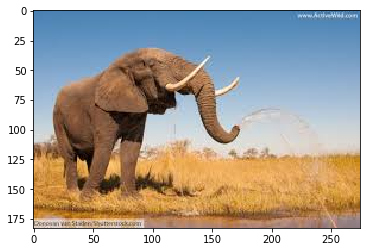

In [487]:
plt.imshow(image)
plt.show()

In [488]:
# now we want to reshape this image into a linear array , reshape it , flatten each channel of the image
all_pixels = image.reshape((-1,3))
print(all_pixels.shape)

(50325, 3)


In [489]:
# so image has  this many features into( X ) 3

In [490]:
from sklearn.cluster import KMeans 

In [491]:
dominant_colors = 4
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [492]:
centres = km.cluster_centers_

In [493]:
print(centres)

[[204.30330882 150.02947742  87.43868172]
 [194.82182023 201.80035617 207.45543162]
 [115.06158449  76.91355478  47.34443986]
 [104.05852003 149.78784793 191.51283096]]


In [494]:
centres

array([[204.30330882, 150.02947742,  87.43868172],
       [194.82182023, 201.80035617, 207.45543162],
       [115.06158449,  76.91355478,  47.34443986],
       [104.05852003, 149.78784793, 191.51283096]])

In [495]:
# now we will make integers value of centres

In [496]:
centres = np.array(centres,dtype='uint8')  

# data type is unsigned integers(as colours value are positive) of 8 bits(because rgb values are from 0 - 255  so 8 bits are taken as 8 bit is 2^8 -1 = 255)

In [497]:
print(centres)

[[204 150  87]
 [194 201 207]
 [115  76  47]
 [104 149 191]]


In [498]:
# plot what all colors are these

In [499]:
# we will draw a plot of 4 boxes , each will have a colour


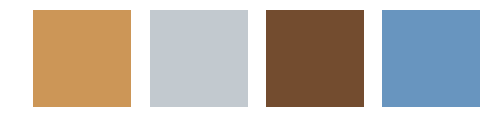

In [500]:
i = 1

plt.figure(0 , figsize=(8,2))  # it is the size of the colour boxes which we are going to make


colors = []

for each_colour in centres:
    plt.subplot(1,4,i)     # row=1 , col=4  , ith partition
    plt.axis("off")  # turn off grid
    i+=1
        
    colors.append(each_colour)  
    
    #color swatch
    a = np.zeros((100,100,3) , dtype='uint8')
    a[:,:,:] = each_colour
    plt.imshow(a)
    
plt.show()    

# segmenting our orignal image

In [506]:
new_image = np.zeros((183*275,3) , dtype = 'uint8')

In [507]:
print(new_image.shape)

(50325, 3)


In [508]:
colors

[array([204, 150,  87], dtype=uint8),
 array([194, 201, 207], dtype=uint8),
 array([115,  76,  47], dtype=uint8),
 array([104, 149, 191], dtype=uint8)]

In [509]:
km.labels_
# it is amatrix , for each pixels it is giving us that id , so we r picking colours of that id

array([3, 3, 3, ..., 3, 3, 3])

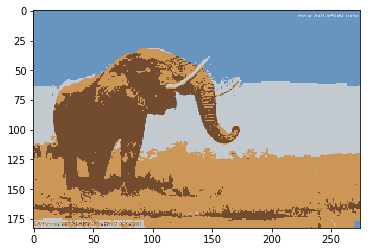

In [510]:
# now we will iterate over the loop
for ix in range (new_image.shape[0]):
    new_image[ix] = colors[km.labels_[ix]]
    
new_image = new_image.reshape((orignal_shape))
plt.imshow(new_image)
plt.show()